In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Configuración para mejorar la visualización de las gráficas
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de figura predeterminado
plt.rcParams['font.size'] = 12

# Carga del DataFrame
df = pd.read_csv('datos_limpios.csv')

# Conversión y limpieza de tipos de datos clave
df['date_added_dt'] = pd.to_datetime(df['date_added_dt'])

# Convertir la columna 'release_year' a entero
df['release_year'] = df['release_year'].fillna(0).astype(int)
df['release_year'] = df['release_year'].replace(0, np.nan) # Vuelve a NaN si se convirtió de un NaN original

print("DataFrame cargado y tipos de datos clave convertidos.")
print("\nInformación del DataFrame:")
print(df.info())

DataFrame cargado y tipos de datos clave convertidos.

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   object        
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_dt     8797 non-null   datetime64[ns]
 

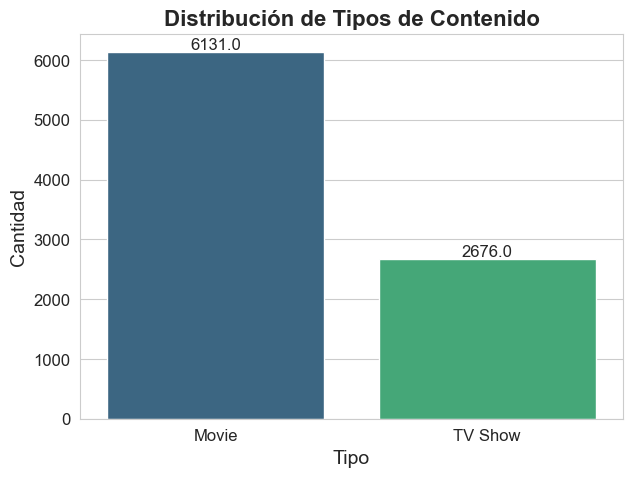

In [3]:
# Gráfico de barras para 'type'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='type', data=df, palette='viridis', order=df['type'].value_counts().index)
plt.title('Distribución de Tipos de Contenido', fontsize=16, fontweight='bold')
plt.xlabel('Tipo', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.savefig("Distribucion_Tipo_contenido.png")
plt.show()

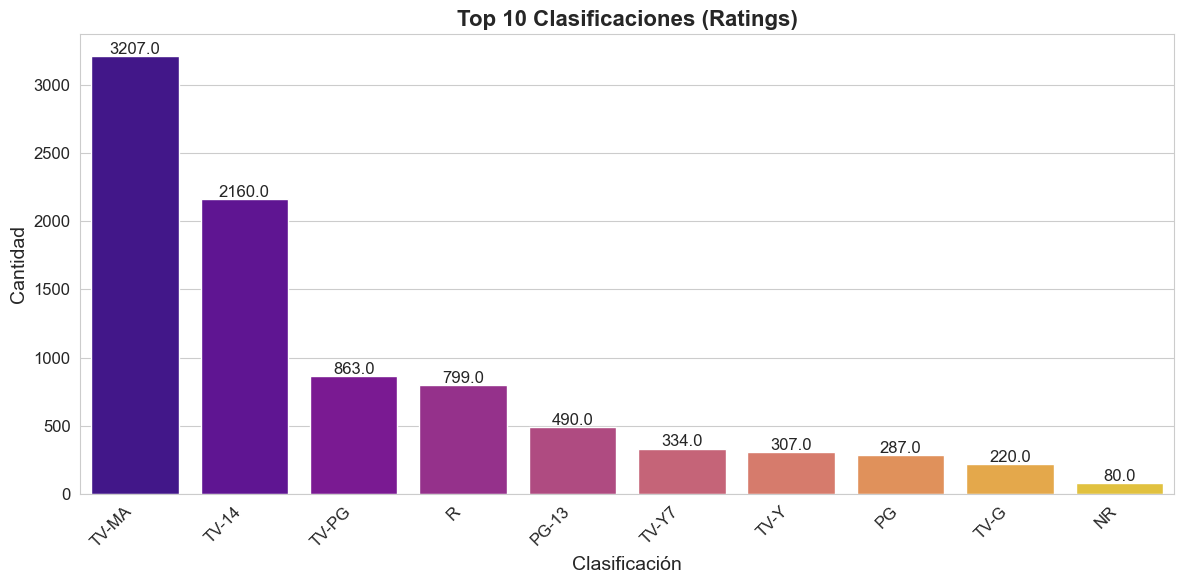

In [4]:
# Gráfico de barras para 'rating'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
top_10_ratings = df['rating'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_ratings.index, y=top_10_ratings.values, palette='plasma')
plt.title('Top 10 Clasificaciones (Ratings)', fontsize=16, fontweight='bold')
plt.xlabel('Clasificación', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de conteo
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig("Top10_rating.png")
plt.show()

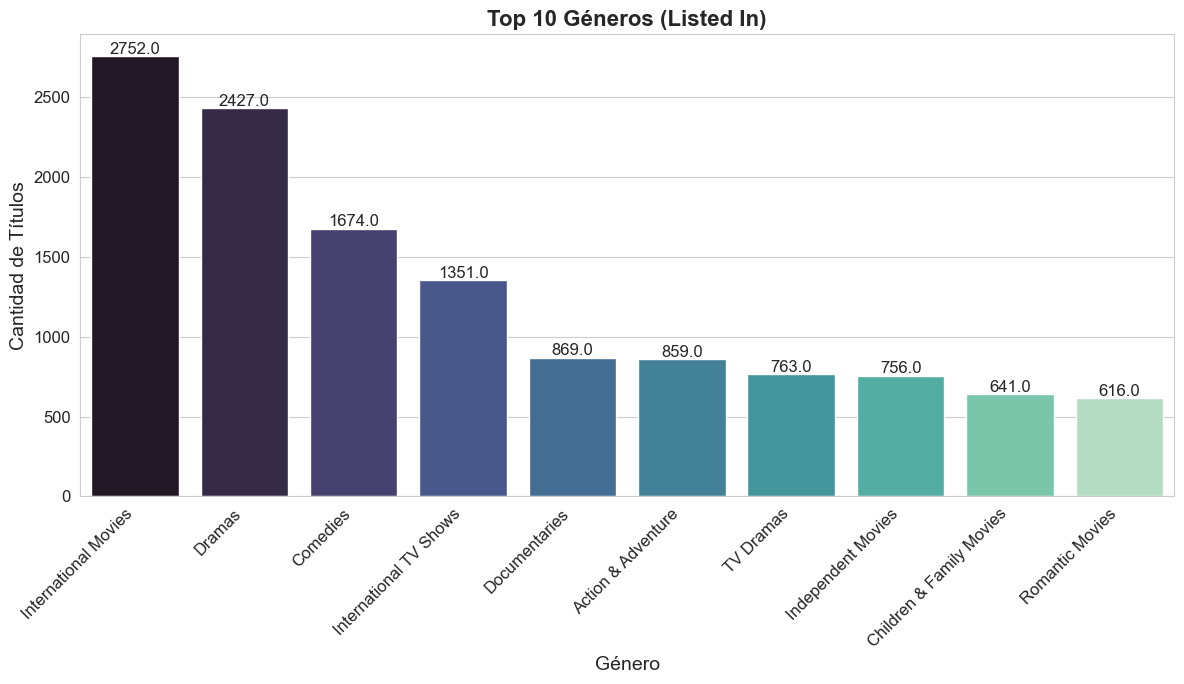

In [5]:
# Función para dividir y contar elementos en una columna (ej. 'listed_in' o 'country')
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
def split_and_count(df, column):
    # Rellenar NaN con una cadena vacía para evitar errores
    all_items = df[column].fillna('').str.split(', ', expand=True).stack()
    return all_items.value_counts()

# Contar los géneros
genre_counts = split_and_count(df, 'listed_in')
top_10_genres = genre_counts.nlargest(10)

# Gráfico de barras para los Top 10 Géneros
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='mako')
plt.title('Top 10 Géneros (Listed In)', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=14)
plt.ylabel('Cantidad de Títulos', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de conteo
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig("Top10_generos.png")
plt.show()

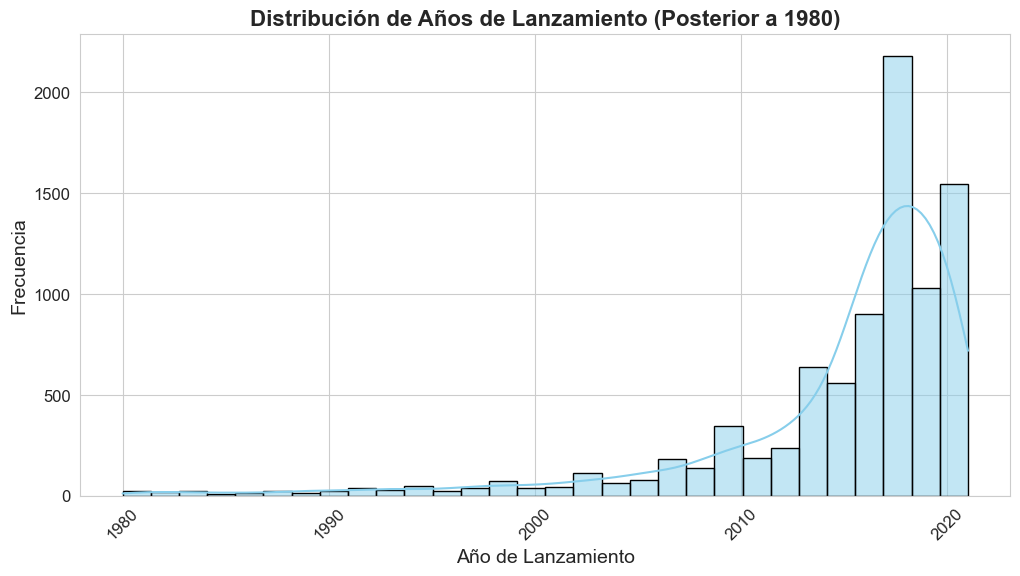

In [6]:
# Se filtran los años para una mejor visualización (por ejemplo, después de 1980)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
df_years = df[df['release_year'] >= 1980].copy()

plt.figure(figsize=(12, 6))
# Histograma
sns.histplot(data=df_years, x='release_year', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de Años de Lanzamiento (Posterior a 1980)', fontsize=16, fontweight='bold')
plt.xlabel('Año de Lanzamiento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)
plt.savefig("Distribucion_anios_lanzamiento.png")
plt.show()

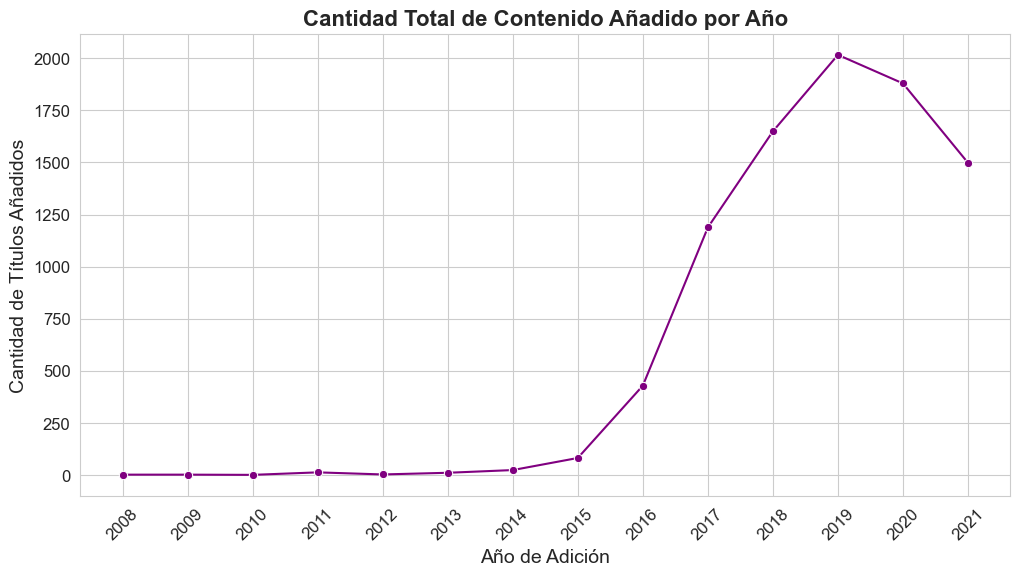

In [7]:
# Extraer el año de la fecha de adición
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
df_temporal = df[df['date_added_dt'].notnull()].copy()
df_temporal['year_added'] = df_temporal['date_added_dt'].dt.year

# Contar el contenido añadido por año
content_per_year = df_temporal['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
# Gráfico de línea
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o', color='purple')
plt.title('Cantidad Total de Contenido Añadido por Año', fontsize=16, fontweight='bold')
plt.xlabel('Año de Adición', fontsize=14)
plt.ylabel('Cantidad de Títulos Añadidos', fontsize=14)
plt.xticks(content_per_year.index, rotation=45)
plt.grid(True)
plt.savefig("Cantidad_total_Contenido.png")
plt.show()

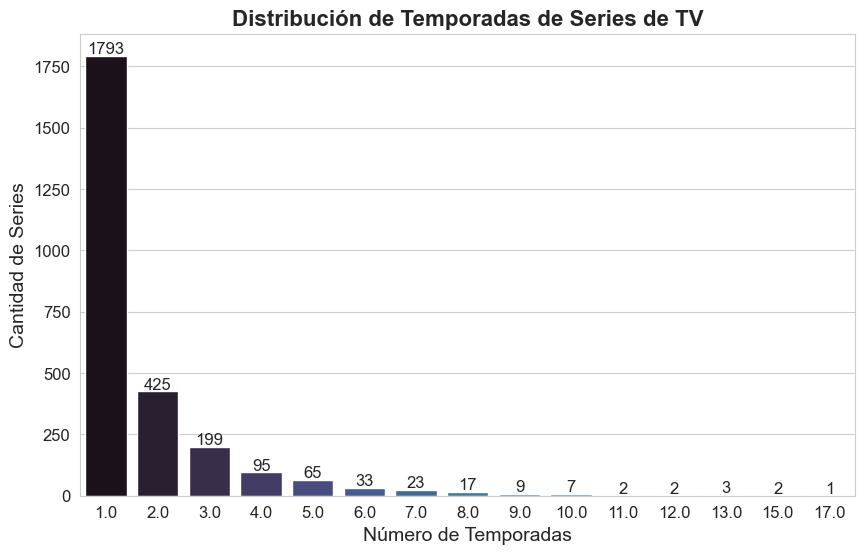

In [8]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
tv_df = df[(df['type'] == 'TV Show') & (df['seasons'].notnull())].copy()

# Contar la frecuencia de las temporadas
seasons_counts = tv_df['seasons'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='mako') # Paleta corregida
plt.title('Distribución de Temporadas de Series de TV', fontsize=16, fontweight='bold')
plt.xlabel('Número de Temporadas', fontsize=14)
plt.ylabel('Cantidad de Series', fontsize=14)

# Agregar etiquetas de conteo
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.savefig("Distribucion_temporadas_series.png")
plt.show() 